In [1]:
# IMPORT THE LIBRARY :

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# EXTRACT THE DATASET :
# Source Dataset : Kaggle.com - https://www.kaggle.com/blastchar/telco-customer-churn

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') # Must be stored in same directory with the .ipynb file.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Checking the distribution of each case in LABEL (Churn) :

shape_total = df.shape[0]
yes_case_number = df.loc[(df.Churn == 'Yes')].shape[0]
no_case_number = df.loc[(df.Churn == 'No')].shape[0]
print('The number of YES Case are:',yes_case_number,'or about', (yes_case_number/shape_total)*100,'%')
print('The number of NO Case are:',no_case_number,'or about',(no_case_number/shape_total)*100,'%')

The number of YES Case are: 1869 or about 26.536987079369588 %
The number of NO Case are: 5174 or about 73.4630129206304 %


In [4]:
# Preparing the data into trainable datasets:

data = df.drop(['customerID'], axis=1)

# LABEL ENCODE THE CATEGORICAL DATA:
labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()
labelencoder3 = LabelEncoder()
labelencoder4 = LabelEncoder()
labelencoder5 = LabelEncoder()
labelencoder6 = LabelEncoder()
labelencoder7 = LabelEncoder()
labelencoder8 = LabelEncoder()
labelencoder9 = LabelEncoder()
labelencoder10 = LabelEncoder()
labelencoder11 = LabelEncoder()


data['gender'] = labelencoder1.fit_transform(data['gender'])
data['MultipleLines'] = labelencoder2.fit_transform(data['MultipleLines'])
data['InternetService'] = labelencoder3.fit_transform(data['InternetService'])
data['Contract'] = labelencoder4.fit_transform(data['Contract'])
data['PaymentMethod'] = labelencoder5.fit_transform(data['PaymentMethod'])
data['OnlineSecurity'] = labelencoder6.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = labelencoder7.fit_transform(data['OnlineBackup'])
data['TechSupport'] = labelencoder8.fit_transform(data['TechSupport'])
data['StreamingTV'] = labelencoder9.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = labelencoder10.fit_transform(data['StreamingMovies'])
data['DeviceProtection'] = labelencoder11.fit_transform(data['DeviceProtection'])

data = data.drop(data[data.TotalCharges == " "].index)

data = data.replace(['Yes'],1)
data = data.replace(['No'],0)

data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.5,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.4,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.9,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


In [5]:
# Split the datasets into train and test data:

X = data.drop(['Churn'], axis=1)  # PREDICTORS
y = data['Churn']                 # LABEL

seed = 33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

print('The X_Train size:', X_train.shape)
print('The X_Test size:', X_test.shape)

print('\nThe y_Train size:', y_train.shape,'with the distribution of YES is:',
      (y_train.loc[y_train == 1].shape[0]/y_train.shape[0])*100,'%')

print('The y_Test size:', y_test.shape,'with the distribution of YES is:',
      (y_test.loc[y_test == 1].shape[0]/y_test.shape[0])*100,'%')

The X_Train size: (5274, 19)
The X_Test size: (1758, 19)

The y_Train size: (5274,) with the distribution of YES is: 26.60219946909367 %
The y_Test size: (1758,) with the distribution of YES is: 26.507394766780436 %


In [6]:
# Resampling Data (Using Undersampling Methods)

temp_data = pd.concat([X_train, y_train], axis=1)

temp_yes = temp_data.loc[temp_data.Churn == 1]
temp_no = temp_data.loc[temp_data.Churn == 0]
temp_no_under = temp_no.sample(temp_yes.shape[0])

new_data = pd.concat([temp_no_under, temp_yes], axis=0)

new_x_train = new_data.drop(['Churn'], axis=1)
new_y_train = new_data['Churn']

print('New shape of train data:', new_x_train.shape)
print('New shape of train data:', new_y_train.shape)

New shape of train data: (2806, 19)
New shape of train data: (2806,)


In [7]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100)

RF.fit(new_x_train, new_y_train)

y_pred = RF.predict(X_test)

====The Importance Feature of Logistic Reggresion Classifier====

        Features  Importance
    TotalCharges       16.26
  MonthlyCharges       15.96
          tenure       15.03
        Contract       12.59
   PaymentMethod        5.03
  OnlineSecurity        4.79
     TechSupport        4.75
 InternetService        3.25
    OnlineBackup        2.86
PaperlessBilling        2.84
          gender        2.67
         Partner        2.18
DeviceProtection        2.16
   MultipleLines        2.15
   SeniorCitizen        1.93
      Dependents        1.75
     StreamingTV        1.67
 StreamingMovies        1.62
    PhoneService        0.50


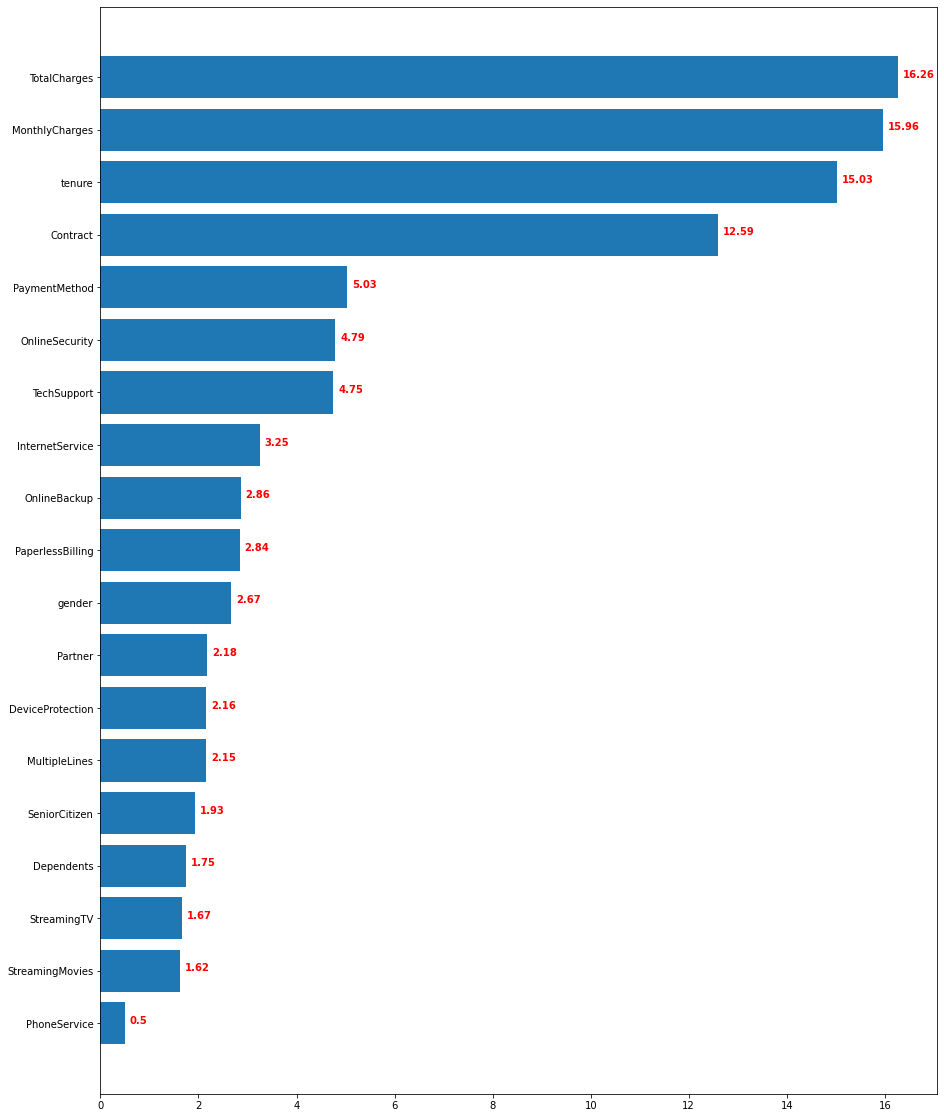

In [8]:
# Predictor/Feature Importance for Each Variable

import math

print('====The Importance Feature of Logistic Reggresion Classifier====\n')

importance = RF.feature_importances_
columns_list = new_x_train.columns.values

total_weight = importance.sum()
transformed_importance = [(x/total_weight)*100 for x in importance]
transformed_importance_v2 = [round(x,2) for x in transformed_importance]

importance_df = pd.DataFrame()
importance_df['Features'] = columns_list
importance_df['Importance'] = transformed_importance_v2
importance_df.sort_values(by=['Importance'], ascending=True, inplace=True)

# summarize feature importance

print(importance_df.sort_values(by=['Importance'], ascending=False).to_string(index=False))

plt.figure(figsize=(15,20))
plt.barh(importance_df['Features'], importance_df['Importance'])
for i, v in enumerate(importance_df['Importance']):
    plt.text(v + .1, i, str(v), color='red', fontweight='bold')
plt.show()

In [9]:
# PREDICT DATA: 

print('Class dari output:',RF.classes_, 'where (0) -> NO dan (1) -> YES')

y_probability = RF.predict_proba(X_test)

cutoff = list(range(1, 101))
predictions = []

for i in cutoff:
    y_preds = []
    for prob in y_probability:
        if (float(prob[1]) > (i/100)):
            y_preds.append(1)
        else:
            y_preds.append(0)
            
    y_pred_df = pd.DataFrame()
    y_pred_df['MPPT'] = y_preds
    predictions.append(y_pred_df)


Class dari output: [0 1] where (0) -> NO dan (1) -> YES


In [10]:
# Print the Cutoff Probabilities and Precision and Accuracy :

precisions = []
accuracy = []
number_predicted_yes = []

for i in cutoff:
    tn, fp, fn, tp = confusion_matrix(y_test, predictions[i-1]).ravel()
    accuracy.append(((tp+tn)/(tp+tn+fp+fn))*100)
    if i == 100:
        precisions.append(0)
    else:
        precisions.append((tp/(tp+fp)*100))
        
for i in cutoff:
    u = predictions[i-1][predictions[i-1].MPPT == 1].shape[0]
    number_predicted_yes.append(u)

pred_table = pd.DataFrame()

pred_table["Cutoff_Level (%)"] = cutoff
pred_table["Precision (%)"] = precisions
pred_table["Number_Of_YES"] = number_predicted_yes
pred_table["Accuracy (%)"] = accuracy

pred_table.head(20)

,Cutoff_Level (%),Precision (%),Number_Of_YES,Accuracy (%)
0,1,28.553846,1625,33.845279
1,2,29.426752,1570,36.746303
2,3,30.071755,1533,38.737201
3,4,30.784708,1491,40.898749
4,5,31.568088,1454,43.003413
5,6,31.963788,1436,44.027304
6,7,32.484076,1413,45.335609
7,8,33.212735,1382,47.098976
8,9,33.602941,1360,48.122867
9,10,34.053651,1342,49.146758


In [11]:
# Save the Cuttoff sampling Result into excel file :

pred_table.to_excel('Churn_Analysis_Cutoff_Sampling.xlsx')

In [12]:
# Sort the Precision Score by the Highest Accuracy :

sort_pred_table = pred_table.sort_values(by=["Accuracy (%)"], ascending=False)
sort_pred_table.head()

,Cutoff_Level (%),Precision (%),Number_Of_YES,Accuracy (%)
72,73,65.373134,335,79.351536
68,69,63.395225,377,79.237770
73,74,65.634675,323,79.237770
71,72,64.450867,346,79.180887
69,70,63.661202,366,79.180887


In [13]:
# Determine the best case of model:

y_probability_arr = list(y_probability)
y_probability_list = [x[1] for x in y_probability_arr]

y_probability_df = pd.DataFrame()
y_probability_df['Churn_Prob'] = y_probability_list

# Reindex the test data :

new_x_test = X_test.reset_index()
new_x_test.drop(columns=['index'], inplace=True)

potential_churn = pd.concat([new_x_test, y_probability_df], axis=1)

potential_churn['gender'] = labelencoder1.inverse_transform(potential_churn['gender'])
potential_churn['MultipleLines'] = labelencoder2.inverse_transform(potential_churn['MultipleLines'])
potential_churn['InternetService'] = labelencoder3.inverse_transform(potential_churn['InternetService'])
potential_churn['Contract'] = labelencoder4.inverse_transform(potential_churn['Contract'])
potential_churn['PaymentMethod'] = labelencoder5.inverse_transform(potential_churn['PaymentMethod'])
potential_churn['OnlineSecurity'] = labelencoder6.inverse_transform(potential_churn['OnlineSecurity'])
potential_churn['OnlineBackup'] = labelencoder7.inverse_transform(potential_churn['OnlineBackup'])
potential_churn['TechSupport'] = labelencoder8.inverse_transform(potential_churn['TechSupport'])
potential_churn['StreamingTV'] = labelencoder9.inverse_transform(potential_churn['StreamingTV'])
potential_churn['StreamingMovies'] = labelencoder10.inverse_transform(potential_churn['StreamingMovies'])
potential_churn['DeviceProtection'] = labelencoder11.inverse_transform(potential_churn['DeviceProtection'])

potential_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Prob
0,Male,1,0,0,51,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Bank transfer (automatic),25.00,1260.7,0.06
1,Female,1,0,0,27,1,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,78.05,2135.5,0.84
2,Male,1,0,0,55,1,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,1,Electronic check,98.80,5617.75,0.48
3,Female,0,0,0,1,1,No,DSL,No,No,No,No,No,No,Month-to-month,1,Electronic check,45.65,45.65,0.93
4,Male,0,1,0,16,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,75.40,1189.4,0.93


In [14]:
# Find the distribution of top 3 most importance categorical value:

import statistics

potential_churn['TotalCharges'] = potential_churn['TotalCharges'].astype(float)
potential_churn['MonthlyCharges'] = potential_churn['MonthlyCharges'].astype(float)
potential_churn['tenure'] = potential_churn['tenure'].astype(float)

num_feat = ['TotalCharges', 'MonthlyCharges', 'tenure']

for nums in num_feat:
    mean = statistics.mean(potential_churn[nums])
    print('The mean value of',nums,'is:',round(mean,2))

The mean value of TotalCharges is: 2294.24
The mean value of MonthlyCharges is: 64.51
The mean value of tenure is: 32.68


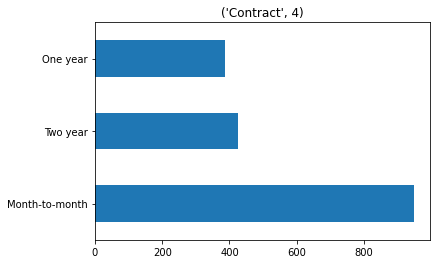

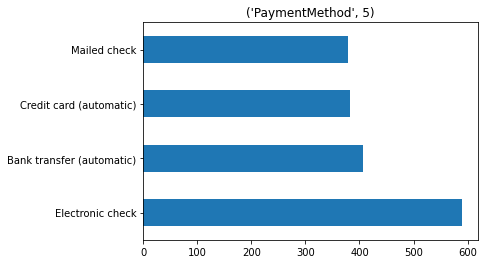

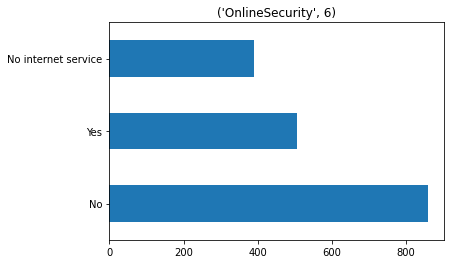

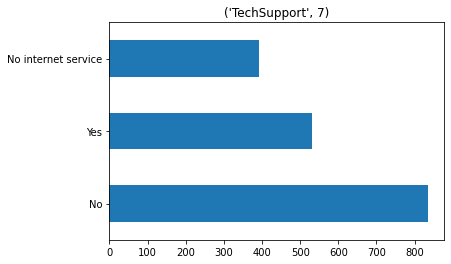

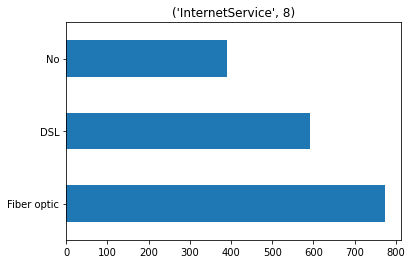

In [15]:
# Find the distribution of each 5 most importance categorical value:

feat = ['Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'InternetService']

counter_plot = []

for col in feat:
    cnt = potential_churn[col].value_counts()
    counter_plot.append(cnt)

for i, prob in enumerate(counter_plot):
    prob.plot(kind='barh')
    plt.title((feat[i],i+4))
    plt.show()
    print("==================================================================================================================")

<p> So, we can finnaly sure from this model the most high probability of churned customer are with these criteria :</p>
<p> - TotalCharge of <b>2294.24</b> </p>
<p> - MonthlyCharge of <b>64.51</b> </p>
<p> - Tenure of 32.68 or <b>33</b> </p>
<p> - Contract : <b>Month-to-Month</b> </p>
<p> - Payment_Method : <b>Electronic Check</b> </p>
<p> - Online_Security : <b>NO</b> </p>
<p> - Tech_Support : <b>NO</b> </p>
<p> - Internet_Service : <b>Fiber Optic</b> </p>